## Market Segmentation
## Scott Stempak, Alex Imhoff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#load data
df = pd.read_csv('social_marketing.csv')
#drop id column and chatter column
df.drop(columns = ['Unnamed: 0', 'chatter'], inplace = True)

# Report for NutrientH20

With the social_marketing.csv data, I wanted to see if there were any interesting market segments that stand out in NutrientH20's social-media audience. For this analysis, I removed the id column and the chatter column as I did not feel like there was any actionable insight from knowing how high they ranked on the 'chatter' variable.

## Approach

For this analysis, I first scaled the data and used PCA, reducing the dimensionality of the data while retaining as much variance in social media interactions as possible. 

In [3]:
#PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components = 2)
principal_components = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

Next, I performed K-means Clustering, clustering the data into 5 unique clusters.

In [4]:
#KMeans
kmeans = KMeans(n_clusters = 5, random_state = 42)

clusters = kmeans.fit_predict(pca_df)

pca_df['Cluster'] = clusters
#add back to original data for later analysis
df['Cluster'] = clusters

/opt/anaconda3/lib/python3.11/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Here is the results of PCA and K-Means clustering in the form of a scatter plot, allowing us to see the resulting 5 clusters.

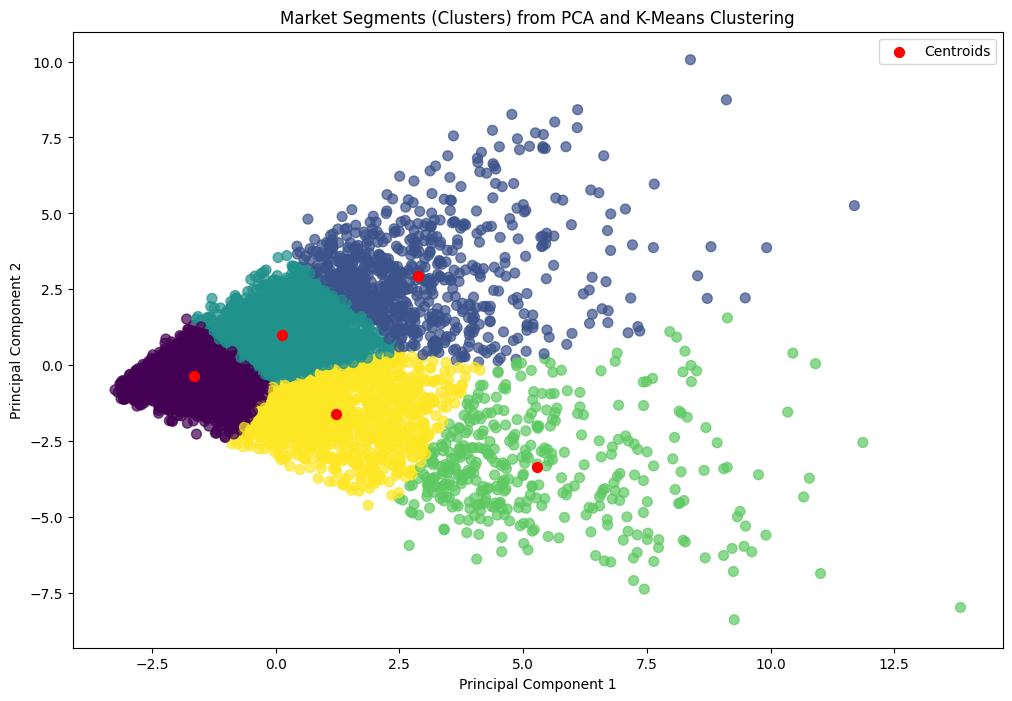

In [5]:
#K-means plot
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', label='Centroids')
plt.title('Market Segments (Clusters) from PCA and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Now I am attaching the cluster labels to the original data and gathered summary statistics about each of the clusters to see what are some key characteristics NutrientH20's social media clusters.

In [6]:
#get the averages for every cluster and then make dataframes for easy access of top characteristics
clustered_df = df.groupby('Cluster').mean()

sorted_cluster_dfs = {}

for cluster in clustered_df.index:
    sorted_df = clustered_df.loc[cluster].sort_values(ascending=False).to_frame(name=f'Segment_{cluster+1}')
    sorted_cluster_dfs[f'Segment_{cluster+1}'] = sorted_df

## Market Segments

Each of the 5 resulting clusters from K-means clustering provide a unique market segment that NutrientH20 can create custom-tailored messaging for, depending on what demographic they want to focus on the most.

### Segment 1: The Bloggers

The first segment is the Bloggers. They have high engagement in photo sharing and current events, but their engagement levels are not extraordinarily high compared to other market segments, making it harder to judge how they would react to certain campaigns. It might be harder to create a marketing campaign specifically tailored to this segment as they seem to not be as engaged in any particular topic, so targeting other market segments and see how this segment engages with those posts might be the best strategy for NutrientH20.

In [7]:
sorted_cluster_dfs['Segment_1'][:10]

,Segment_1
photo_sharing,1.683185
current_events,1.307362
travel,1.142939
health_nutrition,1.138069
politics,1.095388
shopping,0.912346
college_uni,0.886279
sports_fandom,0.765110
news,0.723288
tv_film,0.719565


### Segment 2: The Fitness-Focused Culinary Students

Another market segment is the Fitness-Focused Culinary Students. They have high engagement in cooking, health/nutrition, photo_shartin, personal fitness, and college posts. This segment is currently in college or culinary school, honing their cooking skills while on maintaining a healthy lifestyle outside of class. For the Fitness-Focuses Culinary Students, NutrientH20 can create content that focuses on cooking content, such as new recipes that use NutrientH20 products or can be made and enjoyed with NutrientH20 products.

In [8]:
sorted_cluster_dfs['Segment_2'][:10]

,Segment_2
cooking,7.876033
health_nutrition,6.968320
photo_sharing,5.811295
fashion,3.882920
personal_fitness,3.792011
college_uni,3.331956
politics,2.867769
beauty,2.577135
shopping,2.523416
travel,2.501377


### Segment 3: The Healthy Instagram Chefs

Another market segment is the Healthy Instagram Chefs. Similar to the Fitness-Focused Culinary Students, they have very high engagement with cooking, photo sharing, and health/nutrition. This group most likely loves to see posts about healthy, weeknight meals that you can make at home, creating a community for people's daily healthy diet journey. For the Healthy Instagram Chefs, NutrientH20 can create content similar to the Fitness-Focused Culinary Students and create posts on "quick-and-easy healthy meals" or "daily meals for a healthy life," resonating with the Healthy Instagram Chefs love of cooking and health/nutrition.

In [9]:
sorted_cluster_dfs['Segment_3'][:10]

,Segment_3
health_nutrition,3.986555
photo_sharing,3.593417
cooking,2.714882
college_uni,2.216041
personal_fitness,2.209087
shopping,1.890125
politics,1.860918
travel,1.770515
online_gaming,1.672230
current_events,1.670839


### Segment 4: The Sporty Theologians

The fourth market segment is the Sporty Theologians. They have high engagement in sports fandom, religion, food, and parenting. This segment likely is composed of parents who are actively involved in their community's sports leagues for their kids and is actively practicing their religion. To target this segment, NutrientH20 can create posts that focus on the community aspect of sports and how NutrientH20 enhances that experience for both the parents and kids.

In [10]:
sorted_cluster_dfs['Segment_4'][:10]

,Segment_4
sports_fandom,7.417755
religion,6.624021
food,5.746736
parenting,5.167102
school,3.441253
family,3.028721
photo_sharing,2.856397
health_nutrition,2.558747
cooking,2.140992
politics,2.093995


### Segment 5: The Jack of All Trades, Masters of None

The last market segment is the Jack of All Trades, Masters of None. They have the highest engagement with sports fandom, politics, and religion but have most general engagement than the other segments. This segment dips its toes in all different kinds of posts, with interests from sports and politics to photo sharing and parenting. It might be harder to create a marketing campaign specifically tailored to this segment as they seem to be interested in a diverse array of topics, so targeting other segments might also attract certain members of the Jack of All Trades, Masters of None.

In [11]:
sorted_cluster_dfs['Segment_5'][:10]

,Segment_5
sports_fandom,3.492444
politics,3.000889
religion,2.619556
food,2.547556
news,2.359111
photo_sharing,2.058667
parenting,2.024889
travel,1.850667
family,1.571556
automotive,1.567111


### Recommendations

After analyzing the social-media audience of NutrientH20 and breaking up their audience into five main market segments, There are a few key recommendations that I have to improve their engagement. 

I believe that NutrientH20 can create three categories of posts to engage their audience: cooking/health-focused posts, sporty, community-based posts, and general posts. The cooking/health-focused posts works to engage the Fitness-Focused Culinary Students and the Healthy Instagram Chefs, two segments that have similar interests. The sporty, community-based aim to engage the Sporty Theologians, who have strong community-based, sports interests. Finally, NutrientH20 should also include some general posts that any audience can interact with as the Bloggers and the Jack of All Trades, Masters of None might engage more with general marketing strategies.

Overall, taking into account these segment characteristics and marketing strategies can increase NutrientH20's social-media interactions and engage their current audience.